In [1]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore') 



In [2]:
# Function to split the dataset
def split_dataset(original_dir, base_dir, train_size=0.7, val_size=0.15, test_size=0.15):
    classes = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # '0-9' + 'a-z'
    
    # Create directories for train, validation, and test sets
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(base_dir, split)
        if not os.path.exists(split_dir):
            os.makedirs(split_dir)
            for class_name in classes:
                os.makedirs(os.path.join(split_dir, class_name))

    # Split the dataset
    for class_name in classes:
        class_dir = os.path.join(original_dir, class_name)
        images = os.listdir(class_dir)
        random.shuffle(images)
        
        train_idx = int(len(images) * train_size)
        val_idx = int(len(images) * (train_size + val_size))

        train_images = images[:train_idx]
        val_images = images[train_idx:val_idx]
        test_images = images[val_idx:]

        # Copy the images to respective directories
        for image in train_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, 'train', class_name, image))
        for image in val_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, 'val', class_name, image))
        for image in test_images:
            shutil.copy(os.path.join(class_dir, image), os.path.join(base_dir, 'test', class_name, image))

# Paths
original_data_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data'  # Original dataset containing folders '0-9' and 'a-z'
base_data_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split'  # Folder where train/val/test folders will be created

# Split the dataset into train, val, and test (70%, 15%, 15%)
split_dataset(original_data_dir, base_data_dir)

# Updated paths after splitting
train_dir = os.path.join(base_data_dir, 'train')
val_dir = os.path.join(base_data_dir, 'val')
test_dir = os.path.join(base_data_dir, 'test')

# Image data generators


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, class_mode='categorical', shuffle=False)

# CNN model with Input layer to remove the warning
model = Sequential([
    Input(shape=(64, 64, 3)),  # Use Input layer for the input shape
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes (0-9 and a-z)
])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
def predict_on_validation_set(val_generator):
    Y_val_pred = model.predict(val_generator)
    return Y_val_pred


Found 2293 images belonging to 36 classes.
Found 666 images belonging to 36 classes.
Found 727 images belonging to 36 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │           4,644 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687,844 (2.62 MB)

 Trainable params: 687,844 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history_no_aug = model.fit(train_generator, epochs=15, validation_data=val_generator)

val_loss, val_acc= model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")
model.save('hand_gesture_model_imgclass_noaug.h5')
# Classification report and confusion matrix on the validation set
Y_val_pred = predict_on_validation_set(val_generator)
y_val_pred = tf.argmax(Y_val_pred, axis=1)
print('Confusion Matrix (Validation Set)')
print(confusion_matrix(val_generator.classes, y_val_pred))
print('Classification Report (Validation Set)')
target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 36 classes (0-9, a-z)
print(classification_report(val_generator.classes, y_val_pred, target_names=target_names))

Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 23s 292ms/step - accuracy: 0.0320 - loss: 3.5858 - val_accuracy: 0.0300 - val_loss: 3.5029
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.0619 - loss: 3.4500 - val_accuracy: 0.3183 - val_loss: 2.6132
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.1362 - loss: 2.9581 - val_accuracy: 0.4189 - val_loss: 1.9624
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.2081 - loss: 2.6102 - val_accuracy: 0.5000 - val_loss: 1.5294
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - accuracy: 0.2381 - loss: 2.3795 - val_accuracy: 0.5736 - val_loss: 1.2616
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.3049 - loss: 2.1223 - val_accuracy: 0.6126 - val_loss: 1.2335
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.3402 - loss: 2.0019 - val_accuracy: 0.6216 - val_loss: 1.1662
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.3547 - loss: 1.9268 - val_accuracy: 0.6637 -

Validation Accuracy: 0.8033033013343811
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Confusion Matrix (Validation Set)
[[0 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 1]
 [1 2 0 ... 0 1 0]
 [0 0 0 ... 0 1 1]]
Classification Report (Validation Set)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        17
           5       0.09      0.11      0.10        19
           6       0.00      0.00      0.00        19
           7       0.05      0.05      0.05        19
           8       0.11      0.06      0.08        17
           9       0.00      0.00      0.00        19
           a       0.04      0.06      0.04        18
           b       0.00      0.00      0.00        19
           c       0.00 

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
history_aug = model.fit(train_generator, epochs=15, validation_data=val_generator)
model.save('hand_gesture_model_imgclass_aug.h5')
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")

# Classification report and confusion matrix on the validation set
Y_val_pred = predict_on_validation_set(val_generator)
y_val_pred = tf.argmax(Y_val_pred, axis=1)
print('Confusion Matrix (Validation Set)')
print(confusion_matrix(val_generator.classes, y_val_pred))
print('Classification Report (Validation Set)')
target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 36 classes (0-9, a-z)
print(classification_report(val_generator.classes, y_val_pred, target_names=target_names))

Found 2293 images belonging to 36 classes.
Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.4117 - loss: 1.6531 - val_accuracy: 0.7988 - val_loss: 0.7278
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.4380 - loss: 1.5685 - val_accuracy: 0.8318 - val_loss: 0.6392
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.4661 - loss: 1.5257 - val_accuracy: 0.7673 - val_loss: 0.7378
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.4830 - loss: 1.4808 - val_accuracy: 0.8153 - val_loss: 0.5858
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.4883 - loss: 1.4306 - val_accuracy: 0.7973 - val_loss: 0.6482
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.5119 - loss: 1.4069 - val_accuracy: 0.8018 - val_loss: 0.6455
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.5146 - loss: 1.3344 - val_accuracy: 0.8348 - val_loss: 0.5064
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.524

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8758 - loss: 0.4256
Validation Accuracy: 0.8753753900527954
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Confusion Matrix (Validation Set)
[[0 2 0 ... 0 1 2]
 [1 0 0 ... 3 0 1]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [1 1 0 ... 2 0 0]]
Classification Report (Validation Set)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        19
           3       0.05      0.05      0.05        19
           4       0.11      0.12      0.11        17
           5       0.05      0.05      0.05        19
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        17
           9       0.10      0.11      0.10        19
           a       0.00      0.00      0.00        18
    

In [6]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Image data generators with augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)


val_datagen = ImageDataGenerator(rescale=1./255)

# Directories for the dataset
train_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/train'
val_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/val'

# Flow from directory for train and validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(64, 64), batch_size=32, class_mode='categorical')

# Load the VGG16 model pre-trained on ImageNet, excluding the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Freeze the convolutional base of VGG16
for layer in base_model.layers:
    layer.trainable = False

# Create the new model on top of the pre-trained base
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes (0-9, a-z)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
history_vgg = model.fit(train_generator, epochs=15, validation_data=val_generator)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")
model.save('hand_gesture_model_vgg.h5')
# Generate predictions on validation set
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix and classification report for the validation set
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 0-9 and a-z
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


Found 2293 images belonging to 36 classes.
Found 666 images belonging to 36 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,248,484 (58.17 MB)

 Trainable params: 533,796 (2.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - accuracy: 0.0939 - loss: 3.4822 - val_accuracy: 0.5225 - val_loss: 2.0004
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.3242 - loss: 2.3457 - val_accuracy: 0.6712 - val_loss: 1.3818
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.4478 - loss: 1.8633 - val_accuracy: 0.7357 - val_loss: 1.0164
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - accuracy: 0.4908 - loss: 1.5816 - val_accuracy: 0.7793 - val_loss: 0.8371
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.5615 - loss: 1.3860 - val_accuracy: 0.8183 - val_loss: 0.7392
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.6018 - loss: 1.2425 - val_accuracy: 0.8453 - val_loss: 0.6008
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 302ms/step - accuracy: 0.6284 - loss: 1.1648 - val_accuracy: 0.8634 - val_loss: 0.5866
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 22s 303ms/step - accuracy: 0.6544 - loss: 1.0806 - val_accu

Validation Accuracy: 0.8873873949050903
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step
Confusion Matrix
[[0 1 0 ... 2 0 1]
 [0 0 1 ... 0 1 1]
 [0 3 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        19
           3       0.05      0.05      0.05        19
           4       0.00      0.00      0.00        17
           5       0.09      0.11      0.10        19
           6       0.00      0.00      0.00        19
           7       0.06      0.05      0.05        19
           8       0.05      0.06      0.05        17
           9       0.00      0.00      0.00        19
           a       0.06      0.06      0.06        18
           b       0.05      0.05      0.05        19
           c       0.00      0.00      0.00        15
   

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Image data generators with augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Directories for the dataset
train_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/train'
val_dir = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/val'

# Flow from directory for train and validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=(75, 75), batch_size=32, class_mode='categorical')

# Load the InceptionV3 model pre-trained on ImageNet, excluding the top classification layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Freeze the convolutional base of InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Create the new model on top of the pre-trained base
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes (0-9, a-z)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Train the model
history_incp = model.fit(train_generator, epochs=15, validation_data=val_generator)

# Evaluate on validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc}")
model.save('hand_gesture_model_incp.h5')
# Generate predictions on validation set
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix and classification report for the validation set
print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

target_names = [str(i) for i in range(10)] + [chr(i) for i in range(97, 123)]  # 0-9 and a-z
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=target_names))


Found 2293 images belonging to 36 classes.
Found 666 images belonging to 36 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 1, 1, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,336,580 (85.21 MB)

 Trainable params: 533,796 (2.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 19s 159ms/step - accuracy: 0.1130 - loss: 3.6652 - val_accuracy: 0.5000 - val_loss: 1.9200
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.2829 - loss: 2.5643 - val_accuracy: 0.5871 - val_loss: 1.3663
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.3537 - loss: 2.1017 - val_accuracy: 0.6757 - val_loss: 1.1351
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4289 - loss: 1.9026 - val_accuracy: 0.6787 - val_loss: 0.9670
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.4524 - loss: 1.7624 - val_accuracy: 0.7192 - val_loss: 0.8543
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4655 - loss: 1.6430 - val_accuracy: 0.7312 - val_loss: 0.7963
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.4708 - loss: 1.5973 - val_accuracy: 0.7492 - val_loss: 0.7975
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.4889 - loss: 1.5317 - val_accuracy: 0

Validation Accuracy: 0.7987987995147705
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step
Confusion Matrix
[[1 1 0 ... 0 0 0]
 [2 1 0 ... 0 1 1]
 [0 0 1 ... 0 2 0]
 ...
 [0 0 0 ... 0 2 1]
 [1 0 1 ... 2 2 1]
 [1 0 0 ... 0 1 2]]
Classification Report
              precision    recall  f1-score   support

           0       0.04      0.06      0.05        16
           1       0.06      0.05      0.06        19
           2       0.05      0.05      0.05        19
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00        19
           6       0.05      0.05      0.05        19
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        17
           9       0.05      0.05      0.05        19
           a       0.05      0.06      0.05        18
           b       0.00      0.00      0.00        19
           c       0.07      0.07      0.07        15
   

In [10]:
import os
import cv2
import numpy as np
import tensorflow as tf
import mediapipe as mp
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

# MediaPipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def extract_hand_connections(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    if results.multi_hand_landmarks:
        connections = []
        for connection in mp_hands.HAND_CONNECTIONS:
            start = results.multi_hand_landmarks[0].landmark[connection[0]]
            end = results.multi_hand_landmarks[0].landmark[connection[1]]
            vector = [end.x - start.x, end.y - start.y, end.z - start.z]
            connections.extend(vector)
        return np.array(connections), results
    return None, None

def load_dataset(dataset_path):
    X = []
    y = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                image = cv2.imread(image_path)
                if image is not None:
                    connections, _ = extract_hand_connections(image)
                    if connections is not None:
                        X.append(connections)
                        y.append(class_name)
    
    return np.array(X), np.array(y)

# Load and preprocess the dataset
train_path = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/train'
val_path = 'C:/Users/sab00/OneDrive/Documents/AB/ML/project/data_split/val'

X_train, y_train = load_dataset(train_path)
X_val, y_val = load_dataset(val_path)

# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)

# Define model parameters
num_classes = len(le.classes_)
input_shape = X_train.shape[1]
model_mediapipe = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model_mediapipe.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mediapipe = model_mediapipe.fit(X_train, y_train_encoded, epochs=15, validation_data=(X_val, y_val_encoded), batch_size=32)

# Evaluate the model
val_loss, val_acc = model_mediapipe.evaluate(X_val, y_val_encoded)
print(f"Validation Accuracy: {val_acc}")

# Save the model
model.save('hand_gesture_model_mediapipe.h5')

Epoch 1/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0778 - loss: 3.5233 - val_accuracy: 0.1530 - val_loss: 3.1161
Epoch 2/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2042 - loss: 2.8096 - val_accuracy: 0.4136 - val_loss: 1.7930
Epoch 3/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5118 - loss: 1.6073 - val_accuracy: 0.6303 - val_loss: 1.1406
Epoch 4/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6686 - loss: 1.0558 - val_accuracy: 0.7576 - val_loss: 0.7910
Epoch 5/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7413 - loss: 0.7711 - val_accuracy: 0.7955 - val_loss: 0.6216
Epoch 6/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7933 - loss: 0.5957 - val_accuracy: 0.8182 - val_loss: 0.5226
Epoch 7/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.4980 - val_accuracy: 0.8394 - val_loss: 0.4496
Epoch 8/15
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8415 - loss: 0.4500 - val_accuracy: 0.8636 - val_loss:

Validation Accuracy: 0.9196969866752625


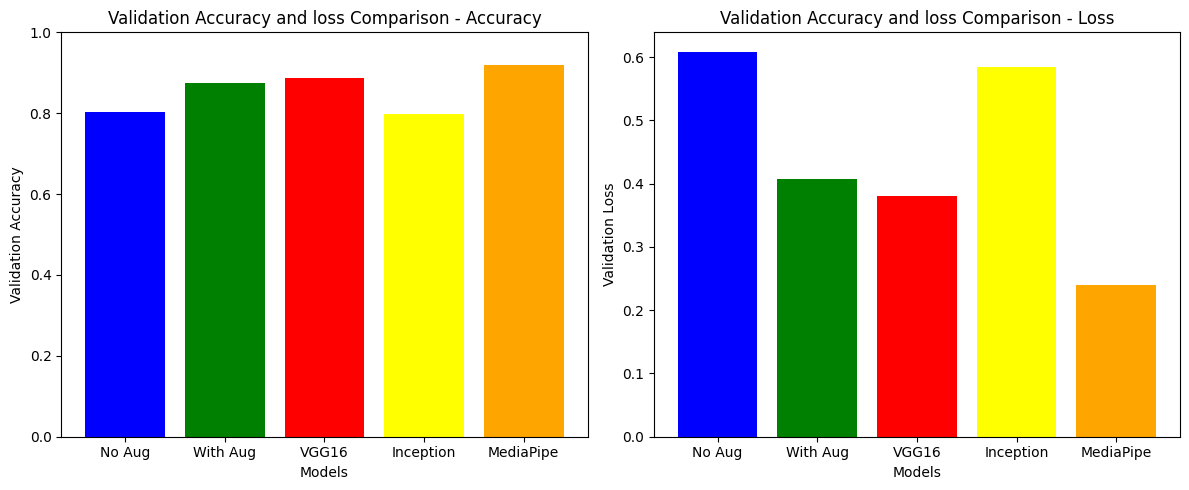

In [13]:
import matplotlib.pyplot as plt
def plot_evaluation_results(models, accuracies, losses, title):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot for accuracy
    ax[0].bar(models, accuracies, color=['blue', 'green', 'red','yellow','orange'])
    ax[0].set_title(f'{title} - Accuracy')
    ax[0].set_xlabel('Models')
    ax[0].set_ylabel('Validation Accuracy')
    ax[0].set_ylim([0, 1])
    
    # Plot for loss
    ax[1].bar(models, losses, color=['blue', 'green', 'red','yellow','orange'])
    ax[1].set_title(f'{title} - Loss')
    ax[1].set_xlabel('Models')
    ax[1].set_ylabel('Validation Loss')
    
    plt.tight_layout()
    plt.show()
# Plot test accuracies for each model
models = ['No Aug', 'With Aug', 'VGG16','Inception','MediaPipe']
accuracies = [
    history_no_aug.history['val_accuracy'][-1],  # Use the last epoch accuracy
    history_aug.history['val_accuracy'][-1], 
    history_vgg.history['val_accuracy'][-1], 
    history_incp.history['val_accuracy'][-1],
    history_mediapipe.history['val_accuracy'][-1]
]

losses = [
    history_no_aug.history['val_loss'][-1],  # Use the last epoch loss
    history_aug.history['val_loss'][-1], 
    history_vgg.history['val_loss'][-1], 
    history_incp.history['val_loss'][-1],
    history_mediapipe.history['val_loss'][-1]
]

plot_evaluation_results(models, accuracies,losses, 'Validation Accuracy and loss Comparison')

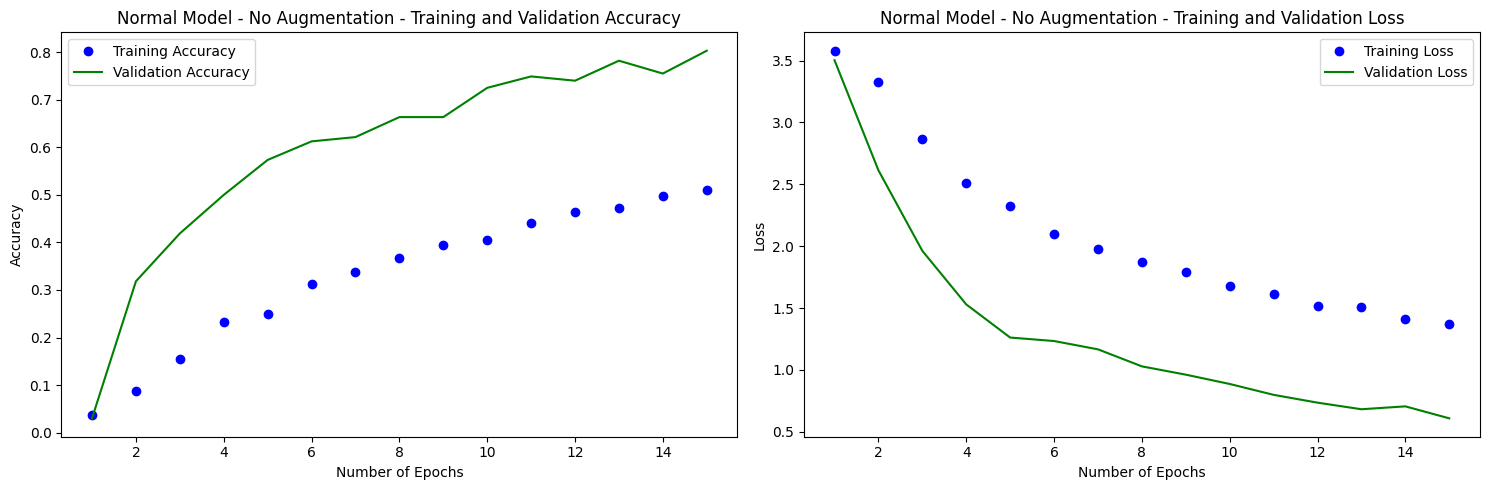

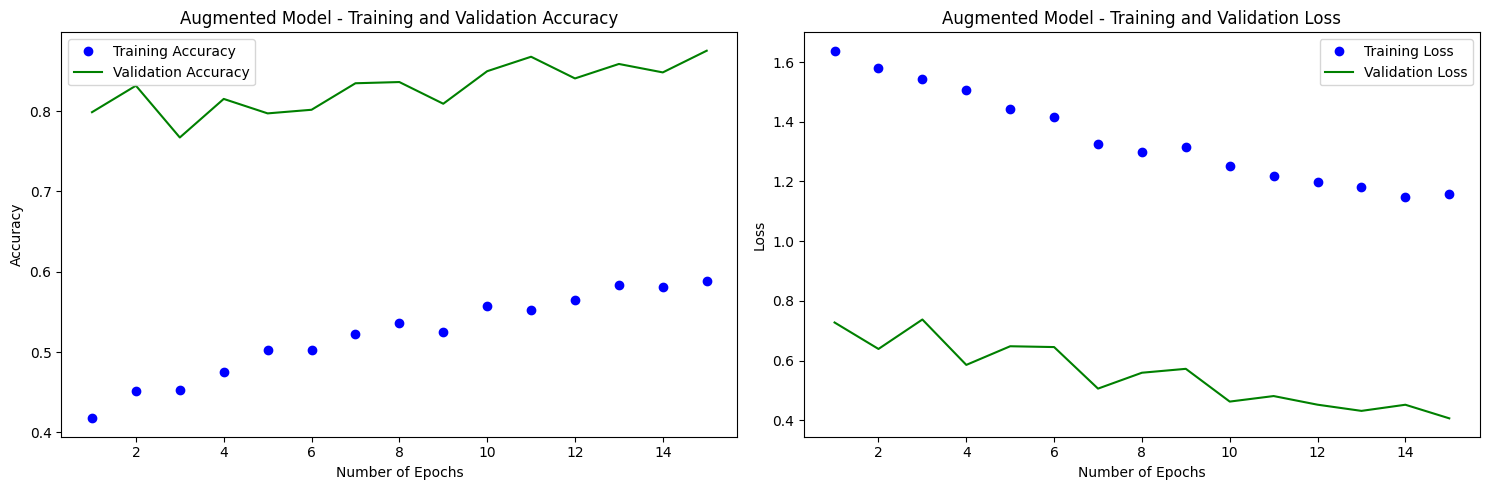

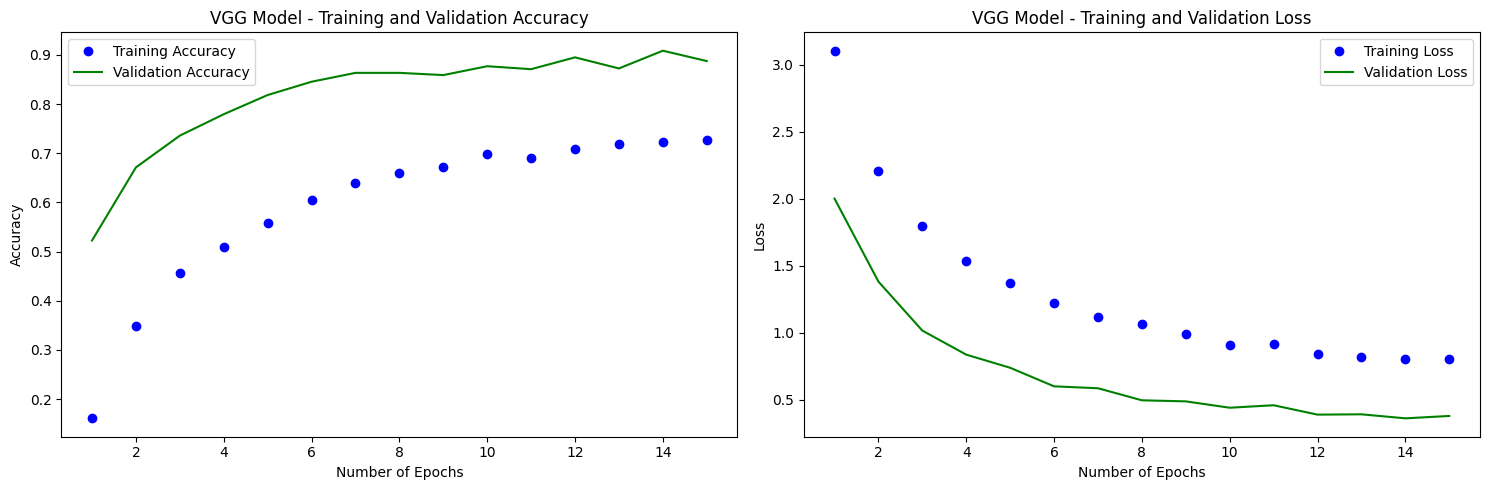

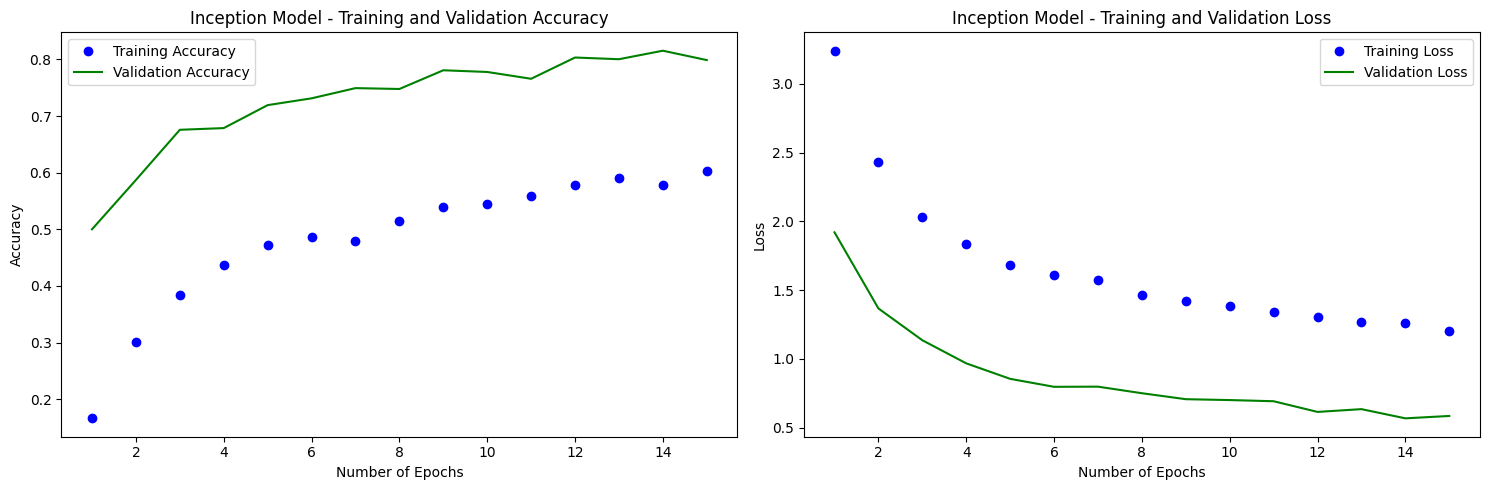

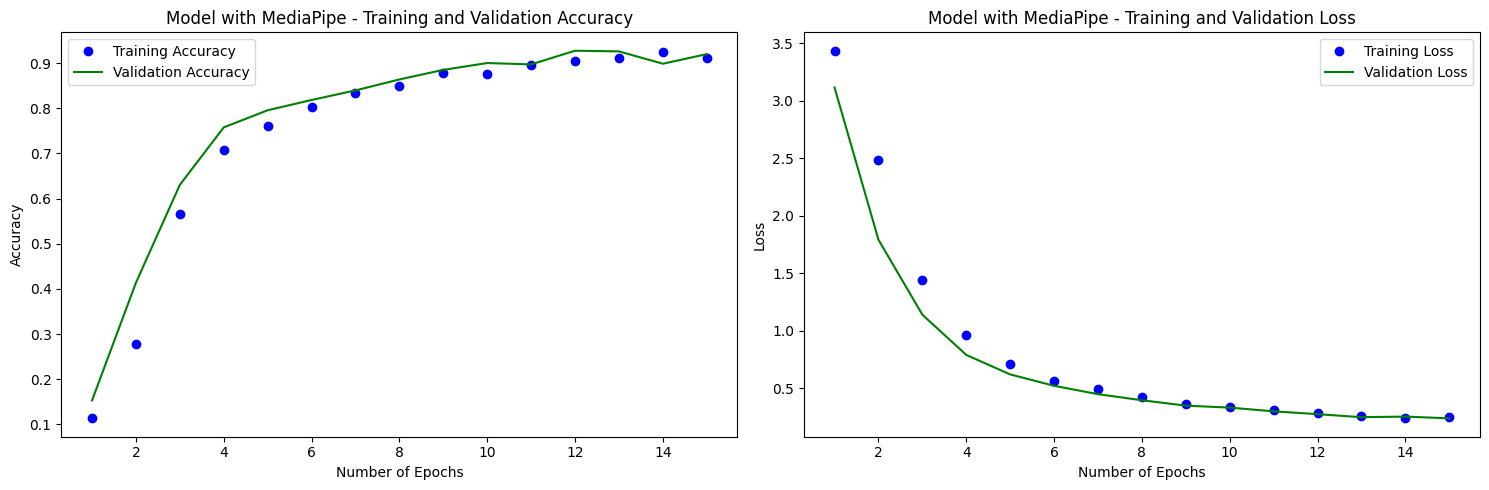

In [15]:
import matplotlib.pyplot as plt

def plot_graph(history, title="Model"):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    num_epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(15, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(num_epochs, accuracy, 'bo', label='Training Accuracy')
    plt.plot(num_epochs, val_accuracy, 'g', label='Validation Accuracy')
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(num_epochs, loss, 'bo', label='Training Loss')
    plt.plot(num_epochs, val_loss, 'g', label='Validation Loss')
    plt.title(f"{title} - Training and Validation Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with the correct history objects
plot_graph(history_no_aug, title="Normal Model - No Augmentation")
plot_graph(history_aug, title="Augmented Model")
plot_graph(history_vgg, title="VGG Model")
plot_graph(history_incp, title="Inception Model")
plot_graph(history_mediapipe, title="Model with MediaPipe")
